## 2D to 1D integral equations
The initial idea was to compute the analytic integral of the stokeslet in the arch region using sympy.
That was not possible, but it could be possible to convert the 2D integral into a 1D integral, and that should probably make the integration much faster. Let's try it out. 

In [1]:
import matplotlib.colors as colors
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp


In [2]:
loaded = np.load("Data/results_mem_time_cpu.npy", allow_pickle=True).item()

p_2d_vfi_cpu = loaded["p_2d_vfi"]
p_1d_cpu = loaded["p_1d"]
p_1d_uni_mid_app_cpu = loaded["p_1d_uni_mid_app"]
x_plot_cpu = loaded["x_plot"]
y_plot_cpu = loaded["y_plot"]
times_cpu = loaded["time_sec"]
mem_cpu = loaded["memory_MB"]
types_cpu = loaded["types"]


In [3]:
loaded.keys()

dict_keys(['types', 'memory_MB', 'time_sec', 'p_2d_vfi', 'p_1d_uni', 'p_1d', 'p_1d_uni_app', 'p_1d_uni_mid_app', 'x_plot', 'y_plot'])

In [4]:
loaded_gpu = np.load("Data/results_mem_time_gpu.npy", allow_pickle=True).item()

p_2d_vfi_gpu = loaded_gpu["p_2d_vfi"]
p_1d_gpu = loaded_gpu["p_1d"]
p_1d_uni_mid_app_gpu = loaded_gpu["p_1d_uni_mid_app"]
x_plot_gpu = loaded_gpu["x_plot"]
y_plot_gpu = loaded_gpu["y_plot"]
times_gpu = loaded_gpu["time_sec"]
mem_gpu = loaded_gpu["memory_MB"]
types_gpu = loaded_gpu["types"]


In [5]:
loaded_gpu.keys()

dict_keys(['types', 'memory_MB', 'time_sec', 'p_2d_vfi', 'p_1d', 'p_1d_uni_mid_app', 'x_plot', 'y_plot'])

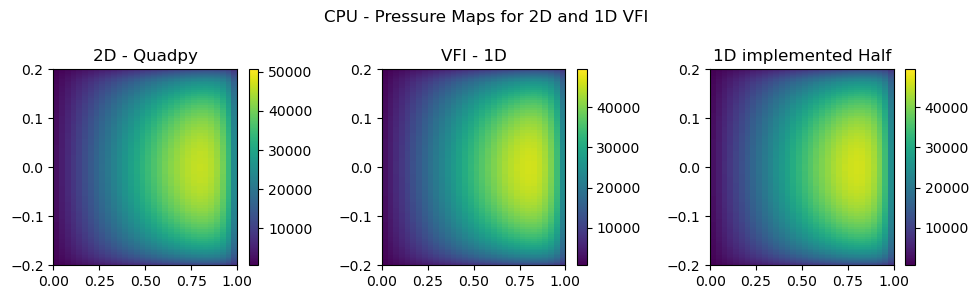

In [6]:

plt.figure(figsize=(10, 3))
plt.suptitle('CPU - Pressure Maps for 2D and 1D VFI')

plt.subplot(1, 3, 1)
plt.title('2D - Quadpy')
p = plt.pcolormesh(x_plot_cpu, y_plot_cpu, np.abs(p_2d_vfi_cpu))
plt.colorbar(p)


plt.subplot(1, 3, 2)
plt.title('VFI - 1D')
p = plt.pcolormesh(x_plot_cpu, y_plot_cpu, np.abs(p_1d_cpu))
plt.colorbar(p)

plt.subplot(1, 3, 3)
plt.title('1D implemented Half')
p = plt.pcolormesh(x_plot_cpu, y_plot_cpu, np.abs(p_1d_uni_mid_app_cpu))
plt.colorbar(p)
plt.tight_layout()
plt.savefig('Figures/Pressure_maps_cpu.png')

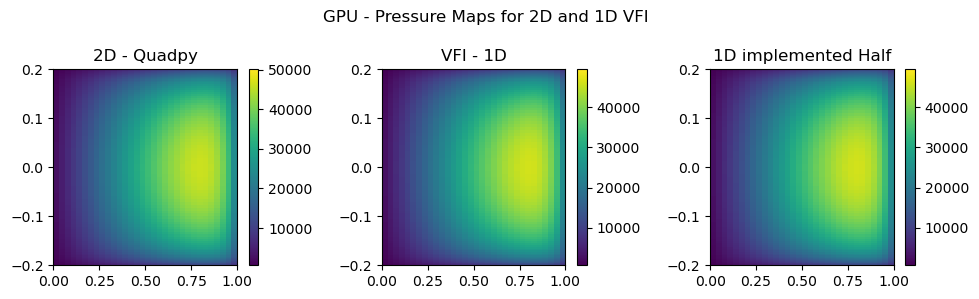

In [7]:

plt.figure(figsize=(10, 3))
plt.suptitle('GPU - Pressure Maps for 2D and 1D VFI')

plt.subplot(1, 3, 1)
plt.title('2D - Quadpy')
p = plt.pcolormesh(x_plot_gpu, y_plot_gpu, np.abs(p_2d_vfi_gpu))
plt.colorbar(p)


plt.subplot(1, 3, 2)
plt.title('VFI - 1D')
p = plt.pcolormesh(x_plot_gpu, y_plot_gpu, np.abs(p_1d_gpu))
plt.colorbar(p)

plt.subplot(1, 3, 3)
plt.title('1D implemented Half')
p = plt.pcolormesh(x_plot_gpu, y_plot_gpu, np.abs(p_1d_uni_mid_app_gpu))
plt.colorbar(p)
plt.tight_layout()
plt.savefig('Figures/Pressure_maps_gpu.png')

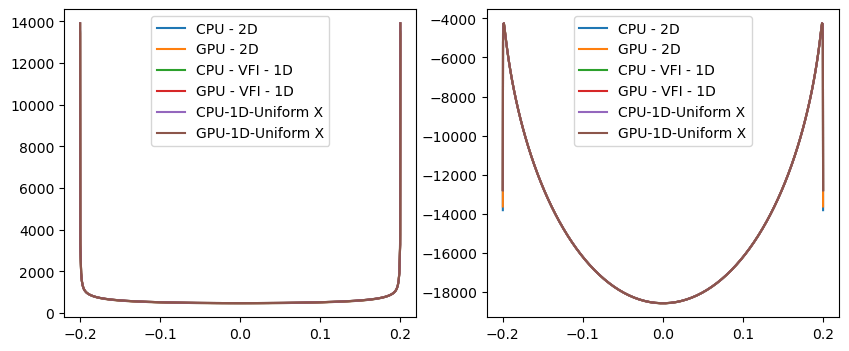

In [8]:

ix = 8#10
yp_cpu = (y_plot_cpu[0,0:-1] + y_plot_cpu[0, 1:])/2
yp_gpu = (y_plot_gpu[0, 0:-1] + y_plot_gpu[0, 1:])/2

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(yp_cpu, np.real(p_2d_vfi_cpu[ix, :]), label='CPU - 2D')
plt.plot(yp_gpu, np.real(p_2d_vfi_gpu[ix, :]), label='GPU - 2D')
plt.plot(yp_cpu, np.real(p_1d_cpu[ix, :]), label='CPU - VFI - 1D')
plt.plot(yp_gpu, np.real(p_1d_gpu[ix, :]), label='GPU - VFI - 1D')
plt.plot(yp_cpu, np.real(p_1d_uni_mid_app_cpu[ix, :]), label='CPU-1D-Uniform X')
plt.plot(yp_gpu, np.real(p_1d_uni_mid_app_gpu[ix, :]), label='GPU-1D-Uniform X')
plt.legend(fontsize=(10))

plt.subplot(1, 2, 2)
plt.plot(yp_cpu, np.imag(p_2d_vfi_cpu[ix, :]), label='CPU - 2D')
plt.plot(yp_gpu, np.imag(p_2d_vfi_gpu[ix, :]), label='GPU - 2D')
plt.plot(yp_cpu, np.imag(p_1d_cpu[ix, :]), label='CPU - VFI - 1D')
plt.plot(yp_gpu, np.imag(p_1d_gpu[ix, :]), label='GPU - VFI - 1D')
plt.plot(yp_cpu, np.imag(p_1d_uni_mid_app_cpu[ix, :]), label='CPU-1D-Uniform X')
plt.plot(yp_gpu, np.imag(p_1d_uni_mid_app_gpu[ix, :]), label='GPU-1D-Uniform X')
plt.legend(fontsize=(10))
plt.legend(fontsize=(10))
plt.savefig('Figures/Pressure_comparison.png')


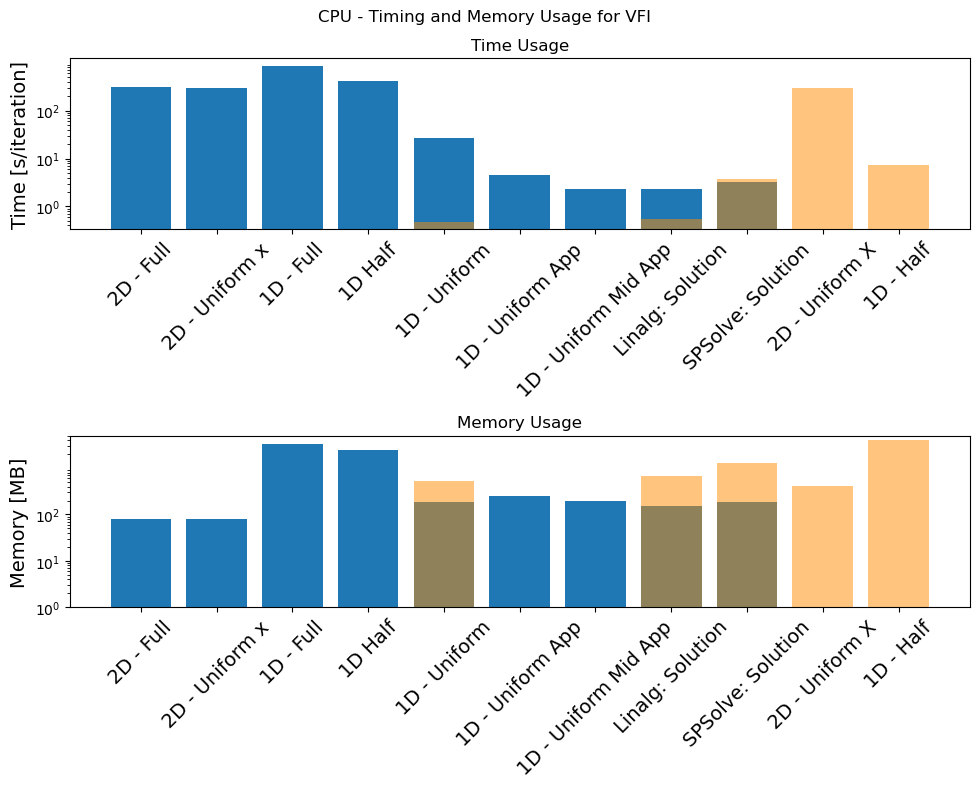

In [14]:
fig = plt.figure(figsize=(10, 8))
plt.suptitle('CPU - Timing and Memory Usage for VFI')
ax = plt.subplot(2, 1, 1)
plt.title('Time Usage')
ax.bar(types_cpu,times_cpu)
ax.bar(types_gpu,times_gpu, color='darkorange', alpha=0.5)
plt.ylabel('Time [s/iteration]', fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.tight_layout()
plt.yscale('log')
plt.yticks([1, 10, 100])

ax = plt.subplot(2, 1, 2)
plt.title('Memory Usage')
ax.bar(types_cpu,mem_cpu)
ax.bar(types_gpu, mem_gpu, color='darkorange', alpha=0.5)
plt.ylabel('Memory [MB]', fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.tight_layout()
plt.yscale('log')
plt.yticks([1, 10, 100])
plt.tight_layout

plt.savefig('Figures/Memory_time_usage.png', dpi=400)
plt.show()

In [10]:
types_cpu

['2D - Full',
 '2D - Uniform x',
 '1D - Full',
 '1D Half',
 '1D - Uniform',
 '1D - Uniform App',
 '1D - Uniform Mid App',
 'Linalg: Solution',
 'SPSolve: Solution']

In [11]:
times_cpu

[310.2157144546509,
 301.35975456237793,
 854.0542478561401,
 424.96344923973083,
 26.339681386947632,
 4.5396199226379395,
 2.3254618644714355,
 2.3084208965301514,
 3.1958789825439453]